In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
etot_kpoint_file = "etot-vs-kpoint.dat"
etot_ecuwfc_file = "etot-vs-ecutwfc.dat"
etot_ecutrho_file = "etot-vs-ecutrho.dat"

In [3]:
etot_kpoint_df = pd.read_csv(etot_kpoint_file, delimiter=' ', names=["# kpoints", "etot"])
etot_ecuwfc_df = pd.read_csv(etot_ecuwfc_file, delimiter=' ', names=["ecutwfc", "etot"])
etot_ecutrho_df = pd.read_csv(etot_ecutrho_file, delimiter=' ', names=["ecutrho", "etot"])

In [4]:
display(etot_ecutrho_df.head())
print(etot_ecutrho_df.shape)

,ecutrho,etot
0,60,-353.174797
1,75,-353.136840
2,90,-353.035120
3,105,-352.945081
4,120,-352.843160


(13, 2)


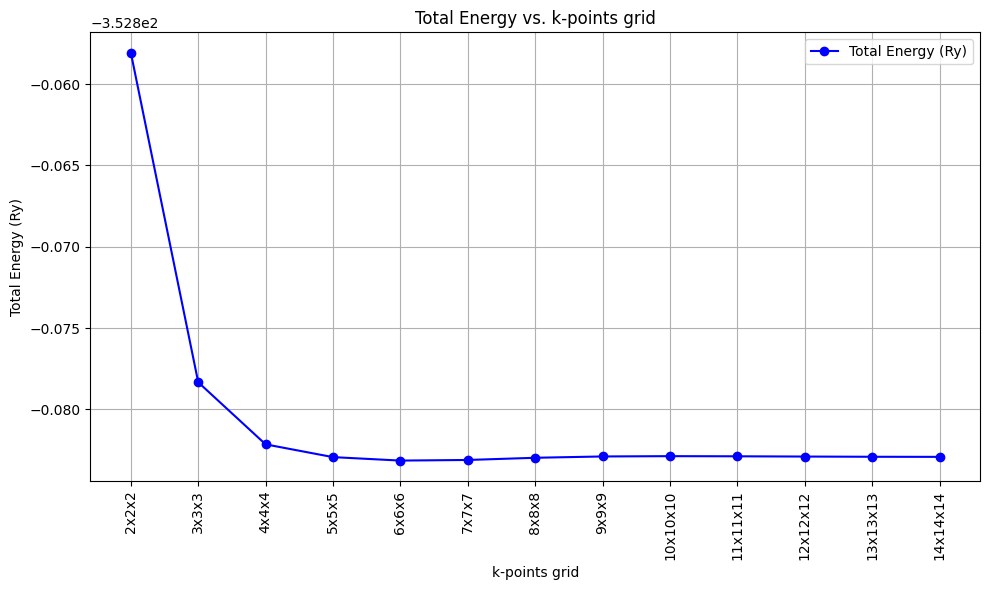

In [5]:
kpoints = etot_kpoint_df["# kpoints"]
kpoints_grid = []
for i in kpoints:
    kpoints_grid.append(rf"{i}x{i}x{i}")
total_energy = etot_kpoint_df["etot"]

plt.figure(figsize=(10, 6))
plt.plot(kpoints, total_energy, marker='o', linestyle='-', color='b', label='Total Energy (Ry)')
plt.xticks(ticks=kpoints, labels=kpoints_grid, rotation=90)
plt.title('Total Energy vs. k-points grid')
plt.xlabel('k-points grid')
plt.ylabel('Total Energy (Ry)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

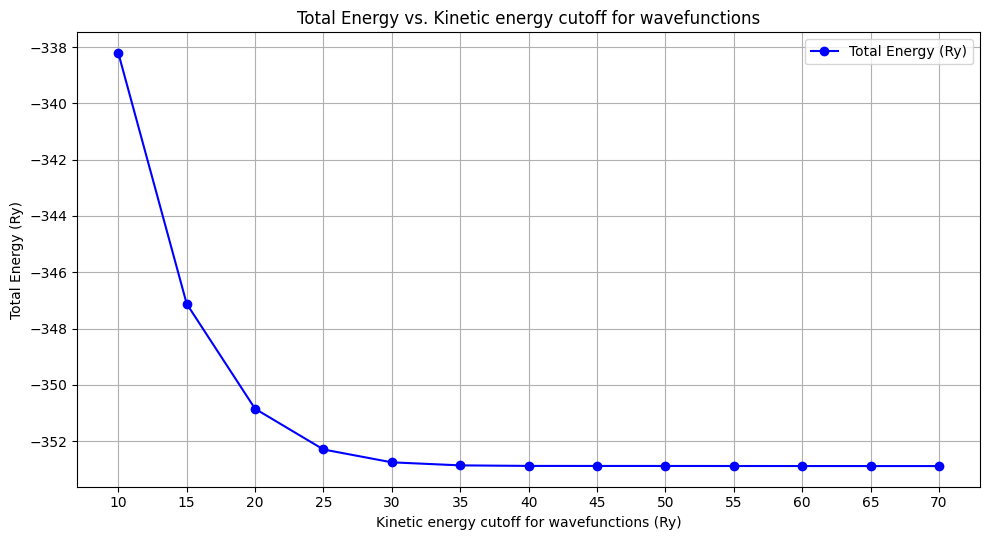

In [6]:
ecutwfc = etot_ecuwfc_df["ecutwfc"]
total_energy = etot_ecuwfc_df["etot"]

plt.figure(figsize=(10, 5.5))
plt.plot(ecutwfc, total_energy, marker='o', linestyle='-', color='b', label='Total Energy (Ry)')
plt.xticks(ecutwfc)
plt.title('Total Energy vs. Kinetic energy cutoff for wavefunctions')
plt.xlabel('Kinetic energy cutoff for wavefunctions (Ry)')
plt.ylabel('Total Energy (Ry)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

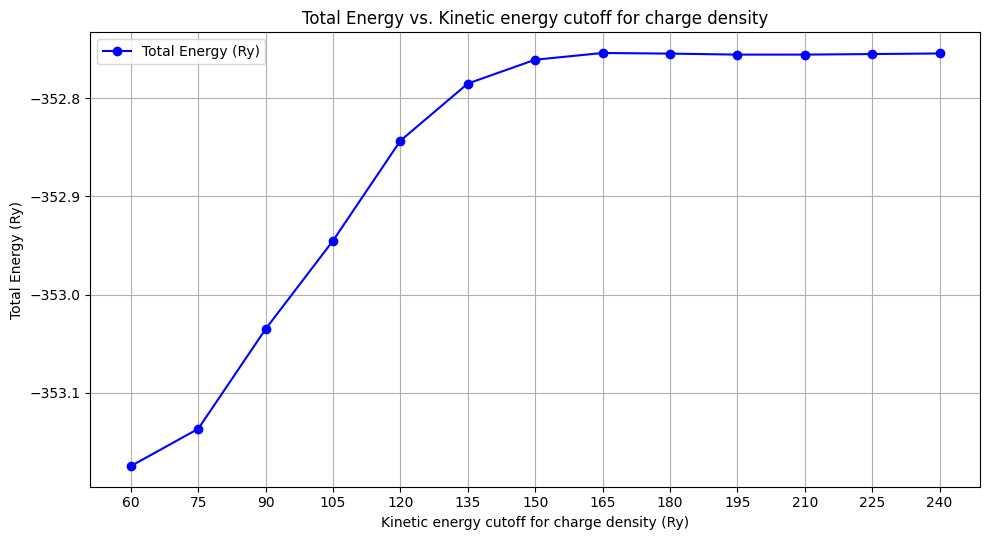

In [7]:
ecutrho = etot_ecutrho_df["ecutrho"]
total_energy = etot_ecutrho_df["etot"]

plt.figure(figsize=(10, 5.5))
plt.plot(ecutrho, total_energy, marker='o', linestyle='-', color='b', label='Total Energy (Ry)')
plt.xticks(ecutrho)
plt.title('Total Energy vs. Kinetic energy cutoff for charge density')
plt.xlabel('Kinetic energy cutoff for charge density (Ry)')
plt.ylabel('Total Energy (Ry)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()